<a href="https://colab.research.google.com/github/Amarjeet-1998/Boston_housing_price_prediction/blob/main/Boston_Housing_Price_prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Boston housing price prediction case study in python**

This case study is based on the famous Boston housing data. It contains the details of 506 houses in the Boston city.

Your task is to create a machine learning model which can predict the average price of house based on its characteristics.

In the below case study I will discuss the step by step approach to create a Machine Learning prediction model in such scenarios.

You can use this flow as a template to solve any supervised ML Regression problem!.

The flow of the case study is as below:


*   Reading the data in python.
*   Defining the problem statement.
*   Identifying the target variable.
*   Looking at the distribution of Target variable
*   Basic Data exploration.
*   Rejecting useless columns
*   Visual Exploratory Data Analysis for Data distribution(Histogram and Barcharts).
*   Feature selection based on data distribution.
*   Outlier treatment.
*   Missing Values treatment.
*   Visual correlation analysis.
*   Statistical correlation analysis(Feature selection).
*   Converting data to numerical for ML
*   Sampling and K-fold cross validation.
*   Trying multiple Regression algorithms
*   Selecting the best model.

I know its a long list! Take a deep breath... and let us get started!.





# **Reading the data into python**

This is one of the most important steps in Machine Learning! You must understand the data and the domain well before trying to apply any machine learning algorithm.

The data has one file " BostonData.csv".This file contains 506 house details from the Boston city.

You can download the data required for this case study here

**Data Description**

The business meaning of each column in the data is as below:



*   CRIM - per capita crime rate by town
*   ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
*   INDUS - proportion of non-retail business acres per town.
*   CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
*NOX - nitric oxides concentration (parts per 10 million)
*RM - average number of rooms per dwelling
*AGE - proportion of owner-occupied units built prior to 1940
*DIS - weighted distances to five Boston employment centres
*RAD - index of accessibility to radial highways
*TAX - full-value property-tax rate per 10,000 dollars
*PTRATIO - pupil/teacher ratio by town
*B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
*LSTAT - % lower status of the population
*MEDV - Median value of owner-occupied homes in $1000's





In [2]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Reading the dataset
import pandas as pd
import numpy as np

BostonData = pd.read_csv("/content/BostonHousingData.csv", encoding = 'latin')

print('Shape before deleting duplicate values: ', BostonData.shape)

# Removing duplicate rows if any
BostonData= BostonData.drop_duplicates()
print('Shape After deleting duplicate values: ', BostonData.shape)

# Printing sample data
# start observing the Quantitative/Categorical/Qualitative variables

BostonData.head(10)



Shape before deleting duplicate values:  (506, 14)
Shape After deleting duplicate values:  (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


# **Defining the Problem statement:**

**Create a ML model which can predict the price(MEDV) of a house **

* Target variable: MEDV
* Predictors: CRIM, ZN, INDUS, CHAS, NOX, RM






# **Determining the type of Machine Learning**

Based on the problem statement you can understand that we need to create a supervised ML Regression model, as the target variable is Continuous.


### Looking at the distribution of Target variable

*  If target variable's distribution is too skewed then the predictive modeling will not be possible.
* Bell curve is desirable but slightly positive skew or negative skew is also fine
* When performing Regression, make sure the histogram looks like a bell curve or slight skewed version of it. Otherwise it impacts the Machine Learning algorithms ability to learn all the scenarios.


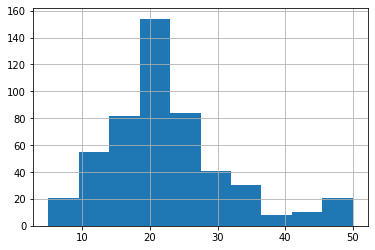

In [5]:
%matplotlib inline
# creating histogram as the Target variable is continuous
# This will help us to understand the distribution of the MEDV values

BostonData['MEDV'].hist()

The data distribution of the target variable is satisfactory to proceed further. There are sufficient number of rows for each type of values to learn from.

# **Basic Data Exploration**

This step is performed to guage the overall data. The volume of data, the types of columns present in the data. Initial assessment of the data should be done to identify which columns are Quantitative, Categorical or Qualitative.

This step helps to start the column rejection process. You must look at each column carefully and ask, does this column affect the values of the Target variable? For example in this case study, you will ask, does this column affect the price of the house? If the answer is a clear "No", then remove the column immediately from the data, otherwise keep the column for further analysis.

There are four commands which are used for Basic data exploration in Python.

* **head()** : This helps to see a few sample rows of the data.
*  **info()** : This provides the summarized information of the data.
* **describe()** : This provides the summarized information of data.
* **nunique()**: This helps us to identify if a column is categorical or continuous.



In [6]:
# Looking at sample rows in the data
BostonData.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
BostonData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 59.3 KB


In [8]:
# Looking at the descriptive statistics of the data
BostonData.describe(include='all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
BostonData.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

# **Basic Data Exploration Results**
Based on the basic exploration above, you can now create a simple report of the data, noting down your observations regaring each column. Hence, creating a initial roadmap for further analysis.

The selected columns in this step are not final, further study will be done and then a final list will be created

* CRIM - Continuous. Selected.
* ZN - Continuous. Selected.
* INDUS - Continuous. Selected.
* CHAS - Categorical. Selected.
* NOX - Continuous. Selected.
* RM - Continuous. Selected.
* AGE - Continuous. Selected.
* DIS - Continuous. Selected.
* RAD - Categorical. Selected.
* TAX - Continuous. Selected.
* PTRATIO - Continuous. Selected.
* B - Continuous. Selected.
* LSTAT - Continuous. Selected.
* MEDV - Continuous. Selected. This is the Target Variable!

# **Removing useless columns from the data**

There are no qualitative variables in the data.

# **Visual Exploratory Data Analysis**

* Categorical variables: Bar plot
* Continuous variable: Histogram


**Visualize distribution of all the Categorical Predictor variables in the data using bar plots**



We can spot a categorical variable in the data by looking at the unique values in them. Typically a categorical variable contains less than 20 Unique values AND there is repetition of values, which means the data can be grouped by those unique values.

Based on the Basic Data Exploration above, we have spotted two categorical predictors in the data

**Categorical Predictors**

'CHAS','RAD'

we use bar charts to see how the data is distributed for these categorical columns.
